In [4]:
!pip install cartopy
!pip install pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import norm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.9 MB/s eta 0:00:00


In [5]:
url='https://raw.githubusercontent.com/AlejandraIvn/DataSharkProyect/main/world_population.csv'
df = pd.read_csv(url)
num_filas = len(df)

num_columnas = len(df.columns)
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

df

Número de filas: 234
Número de columnas: 17


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [7]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.6 MB/s eta 0:00:00


In [8]:
!matplotlib notebook

/bin/bash: line 1: matplotlib: command not found


In [9]:
pima=df

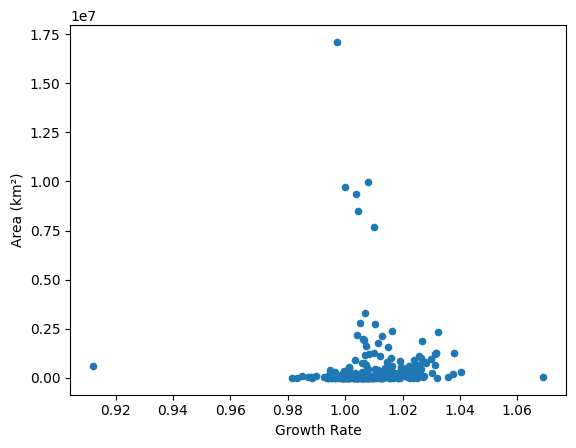

In [10]:
from mmap import ACCESS_READ
Crecimiento='Growth Rate'
Area='Area (km²)'
pima.plot(kind='scatter',x=Crecimiento,y=Area)
plt.show()

In [12]:
!pip install pandas

In [13]:
import pandas as pd
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pima['Growth Rate'], pima['Area (km²)'], test_size=0.2, random_state=42)


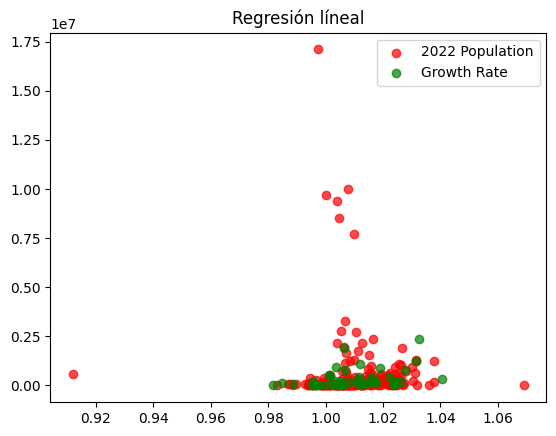

In [21]:
plt.scatter(x_train,y_train,label='2022 Population', color='r', alpha=.7)
plt.scatter(x_test,y_test,label='Growth Rate', color='g', alpha=.7)
plt.legend()
plt.title("Regresión líneal")
plt.show()


In [23]:
LR=LinearRegression()
LR.fit(x_train.values.reshape(-1,1),y_train.values)

LinearRegression()

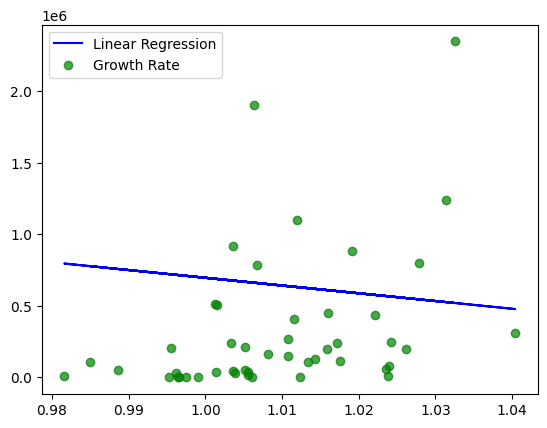

In [25]:
prediction=LR.predict(x_test.values.reshape(-1,1))
plt.plot(x_test,prediction, label='Linear Regression',color='b')
plt.scatter(x_test,y_test,label='Growth Rate',color='g',alpha=.7)
plt.legend()
plt.show()

In [26]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import dash
# Suponiendo que tienes un DataFrame df_population con los datos de población por país y año

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Analysis of Population data using scatter matrix'),
    dcc.Dropdown(
        id="dropdown",
        options=[
            {'label': '2022 Population', 'value': '2022 Population'},
            {'label': '2020 Population', 'value': '2020 Population'},
            {'label': '2015 Population', 'value': '2015 Population'},
            {'label': '2010 Population', 'value': '2010 Population'},
            {'label': '2000 Population', 'value': '2000 Population'},
            {'label': '1990 Population', 'value': '1990 Population'},
            {'label': '1980 Population', 'value': '1980 Population'},
            {'label': '1970 Population', 'value': '1970 Population'}
        ],
        value=['2022 Population', '2020 Population'],
        multi=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    [Input("dropdown", "value")])
def update_scatter_matrix(selected_years):
    # Filtrar el DataFrame para los años seleccionados
    selected_data = df[selected_years + ['Country/Territory']]

    # Crear la matriz de dispersión
    fig = px.scatter_matrix(selected_data, dimensions=selected_years, color="Country/Territory")

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

**Análisis de Europa**

In [ ]:
import plotly.express as px
figura=px.choropleth(df,locations='Code',
                     color='Area (km²)',hover_name='Country/Territory',
                     color_continuous_scale=px.colors.sequential.Plasma)
figura.show()

In [ ]:
import plotly.express as px
figura=px.choropleth(df,locations='Code',
                     color='Density (per km²)',hover_name='Country/Territory',
                     color_continuous_scale=px.colors.sequential.Plasma)
figura.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage'] but received: Code

In [ ]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde tu archivo CSV o cualquier otra fuente de datos
df = pd.read_csv(url)

# Crear el histograma
fig = px.histogram(df, x="2022 Population", color="Continent", marginal="rug", hover_data=df.columns)

# Mostrar el histograma
fig.show()

In [ ]:
df_europa = df.loc[df['Continent'] == 'Europe']
#df_europa.describe()
df_europa


In [ ]:
import plotly.express as px
import pandas as pd
df_europa.rename(columns={"Country/Territory": "pais", "World Population Percentage": "Poblacion_mundial"}, inplace=True)
fig = px.bar(df_europa, x="pais", y="Poblacion_mundial")
fig.show()

In [ ]:
import pandas as pd
import pycountry
def get_alpha_3(location):
  try:
    return pycountry.countries.get(name=location).alpha_3
  except:
    return None
df['Code']=df['Country/Territory'].apply(lambda x: get_alpha_3(x))
print(df.head(6))

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   
5    42  AGO            Angola            Luanda    Africa         35588987   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   
5       

In [ ]:
import plotly.express as px
import pandas as pd
df_asia.rename(columns={"Country/Territory": "pais", "World Population Percentage": "Poblacion_mundial"}, inplace=True)
fig = px.bar(df_asia, x="pais", y="Poblacion_mundial")
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde el archivo CSV
df = pd.read_csv(url)

# Filtrar datos para Europa
df_europa = df[df['Continent'] == 'Europe']

# Representar solo los países grandes
df_europa.loc[df_europa['2022 Population'] < 2e6, 'Country/Territory'] = 'Other countries'

# Crear el gráfico de pastel
fig = px.pie(df_europa, values='2022 Population', names='Country/Territory', title='Población del Continente de Europa en el')

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde el archivo CSV
df = pd.read_csv(url)

# Filtrar datos para Europa
df_europa = df[df['Continent'] == 'Europe']

# Representar solo los países grandes
df_europa.loc[df_europa['2020 Population'] < 2e6, 'Country/Territory'] = 'Other countries'

# Crear el gráfico de pastel
fig = px.pie(df_europa, values='2020 Population', names='Country/Territory', title='Población del Continente de Europa en el año 2020')

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde el archivo CSV
df = pd.read_csv('world_population.csv')

# Filtrar datos para Europa
df_europa = df[df['Continent'] == 'Europe']

# Representar solo los países grandes
df_europa.loc[df_europa['2015 Population'] < 2e6, 'Country/Territory'] = 'Other countries'

# Crear el gráfico de pastel
fig = px.pie(df_europa, values='2015 Population', names='Country/Territory', title='Población del continente de Europa en el año 2015')

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde el archivo CSV
df = pd.read_csv('world_population.csv')

# Filtrar datos para Europa
df_europa = df[df['Continent'] == 'Europe']

# Representar solo los países grandes
df_europa.loc[df_europa['1990 Population'] < 2e6, 'Country/Territory'] = 'Other countries'

# Crear el gráfico de pastel
fig = px.pie(df_europa, values='1990 Population', names='Country/Territory', title='Población del continente de Europa en el año 1990')

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde el archivo CSV
df = pd.read_csv('world_population.csv')

# Filtrar datos para Europa
df_europa = df[df['Continent'] == 'Europe']

# Representar solo los países grandes
df_europa.loc[df_europa['1980 Population'] < 2e6, 'Country/Territory'] = 'Other countries'

# Crear el gráfico de pastel
fig = px.pie(df_europa, values='1980 Population', names='Country/Territory', title='Población del continente de Europa en el año 1980')

# Mostrar el gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde el archivo CSV
df = pd.read_csv('world_population.csv')

# Filtrar datos para Europa
df_europa = df[df['Continent'] == 'Europe']

# Representar solo los países grandes
df_europa.loc[df_europa['1970 Population'] < 2e6, 'Country/Territory'] = 'Other countries'

# Crear el gráfico de pastel
fig = px.pie(df_europa, values='1970 Population', names='Country/Territory', title='Población del continente de Europa en el año 1970')

# Mostrar el gráfico
fig.show()

In [ ]:
df_asia = df.loc[df['Continent'] == 'Asia']
df_asia

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Code
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,AFG
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03,ARM
13,91,AZE,Azerbaijan,Baku,Asia,10358074,10284951,9863480,9237202,8190337,7427836,6383060,5425317,86600,119.6082,1.0044,0.13,AZE
15,154,BHR,Bahrain,Manama,Asia,1472233,1477469,1362142,1213645,711442,517418,362595,222555,765,1924.4876,1.0061,0.02,BHR
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,BGD
23,165,BTN,Bhutan,Thimphu,Asia,782455,772506,743274,705516,587207,558442,415257,298894,38394,20.3796,1.0064,0.01,BTN
29,175,BRN,Brunei,Bandar Seri Begawan,Asia,449002,441725,421437,396053,333926,261928,187921,133343,5765,77.8841,1.0081,0.01,None
33,73,KHM,Cambodia,Phnom Penh,Asia,16767842,16396860,15417523,14363532,12118841,8910808,6198959,6708525,181035,92.6221,1.0108,0.21,KHM
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,CHN
73,131,GEO,Georgia,Tbilisi,Asia,3744385,3765912,3771132,3836831,4265172,5391636,5145843,4800426,69700,53.7214,0.9964,0.05,GEO


In [ ]:
import plotly.express as px
import pandas as pd
df_asia.rename(columns={"Country/Territory": "pais", "World Population Percentage": "Poblacion_mundial"}, inplace=True)
fig = px.bar(df_asia, x="pais", y="Poblacion_mundial")
fig.show()

<ipython-input-55-3f78514669d6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
import pycountry
def get_alpha_3(location):
  try:
    return pycountry.countries.get(name=location).alpha_3
  except:
    return None
df['Code']=df['Country/Territory'].apply(lambda x: get_alpha_3(x))
print(df.head(6))

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   
5    42  AGO            Angola            Luanda    Africa         35588987   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   
5       

In [ ]:
p_value=stats.ttest_ind(df['2022 Population'],df['2020 Population'],equal_var=True)

In [ ]:
print(p_value)

TtestResult(statistic=0.04554036776232616, pvalue=0.9636961079040314, df=466.0)


In [ ]:
mean2022Population, mean2020Population=df['2022 Population'].mean(),df['2020 Population'].mean()
std2022Population, std2020Population =df['2022 Population'].std(), df['2020 Population'].std()

Text(0.5, 0, 'm')

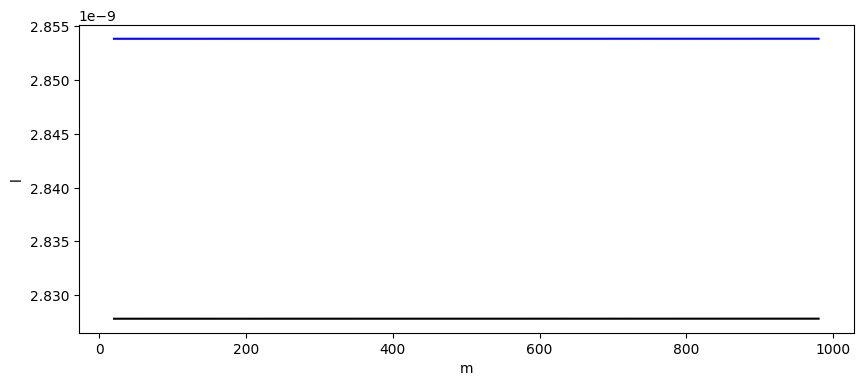

In [ ]:
x=np.arange(20,1000,20)
plt.figure(figsize=(10,4))
plt.plot(x, norm.pdf(x,mean2022Population,std2022Population), label='2022 Population', color='k')
plt.plot(x, norm.pdf(x,mean2020Population,std2020Population), label='2020 Population', color='b')
plt.ylabel('l')
plt.xlabel('m')
